Introduction to skimage wich alllow us to make image processing

we will use io class inside skimage module to upload and read an image and finally display this image

import io class from skimage

In [3]:
from skimage import io

To upload an image and read it we use io.imread() function wich returs a numpy array containing the pixels of 
the image

In [18]:
dog=io.imread('D:\download\chien.jpg')

To view an image we use io.imshow() function

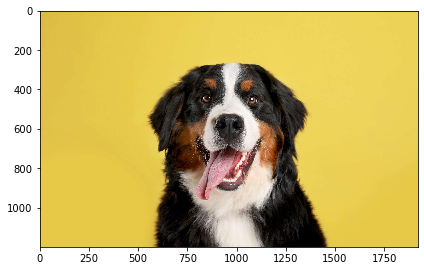

In [19]:
io.imshow(dog)

we can get the image resolution using shape function on the array

In [20]:
print(dog.shape)

(1200, 1920, 3)


example of processing by changing in black certains pixels at top of the image

In [21]:
dog1=dog
dog1[:100][:1920]=0

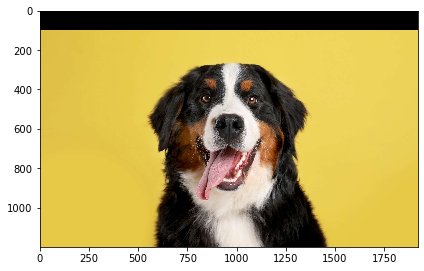

In [14]:
io.imshow(dog1)

Looking at pixels values.
To do this, we save the numpy array in one line—in other words, we use one row to store all the pixel values.

importing of pandas module.
This module allow us read, write and process various file format.

In [22]:
import pandas as pd

We use the array's flatten() function to lenearize a numpy array, so in our case to change 3 dimensions array into one
The DataFrame function converts a one-dimensional array into an Excel-like format, with rows and 
columns.

In [42]:
df= pd.DataFrame(dog.flatten())

In [39]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
6911995,201
6911996,71
6911997,231
6911998,201


with DataFrame object we can now save our image in excel format with to_excel() function

In [ ]:
filepath = 'D:\pixel_values.xlsx'
df.to_excel(filepath, index=False)

So after processing an image we want to save it. It is possible thank for imsave() function in io class
Hence here i will save dog's image with black line at top.
io.imsave() takes two arguments, first one is the name of file and the scond the variable containing the image

In [43]:
io.imsave('D:\dog_blacktop.jpg',dog1)

Creating Basic Drawings
We want to draw within an image certains figures
To draw something inside image we use draw class in module skimage

To draw a line we use draw.line() function wich takes 4 parameters
The first two indicates the coordinate of the first point and the last indicate the coordinate of the second point.
the function returns an array containing the coordinate of each pixels of the line. But its abstract according to the image
the line can be small or big depending on it's resolution.

(array([   0,    1,    1, ..., 1198, 1198, 1199], dtype=int64),
 array([1919, 1918, 1917, ...,    2,    1,    0], dtype=int64))

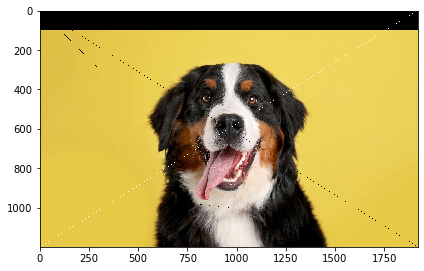

In [83]:
from skimage import draw
x,y= draw.line(0,1919,1199,0)
img=dog
img[x,y]=255
io.imshow(img)
x,y

with rectangle
To draw rectangle we use polygon function wich draw any king of polygon
it takes in argument two array of the coordinate of 4 or more point wich describe our poulygone and return the coordinate of
each pixel
So we difine a function rectangle to describe the coordinate of the four point of rectangle

(array([   0,    1,    1, ..., 1198, 1198, 1199], dtype=int64),
 array([1919, 1918, 1917, ...,    2,    1,    0], dtype=int64))

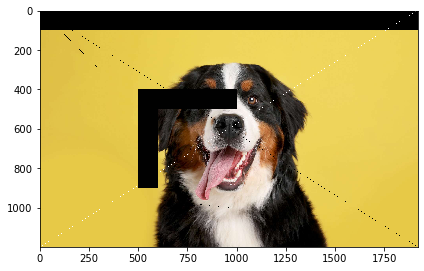

In [91]:
def rectangle(x,y,w,h):
    rr, cc = [x, x + h, x + h, x], [y, y, y + w, y + w]
    return (draw.polygon(rr, cc))
rr,cc= rectangle(400,500,500,100)
img=dog
img[rr,cc]=1
io.imshow(img)
x,y

with circle
the first two argument defini the position of the center of circle and the last one the radius

C:\Users\user\AppData\Local\Temp/ipykernel_26452/2164477666.py:1: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  x,y= draw.circle(900,875,100)


(array([801, 801, 801, ..., 999, 999, 999], dtype=int64),
 array([861, 862, 863, ..., 887, 888, 889], dtype=int64))

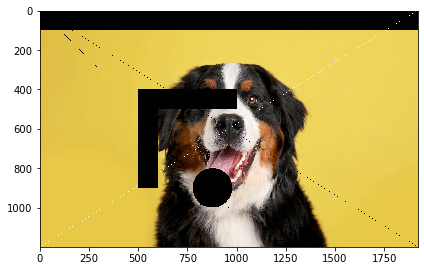

In [95]:
x,y= draw.circle(900,875,100)
img=dog
img[x,y]=1
io.imshow(img)
x,y

Rotation and resizing
The class transform in skimage allows us to rotate and resize an image

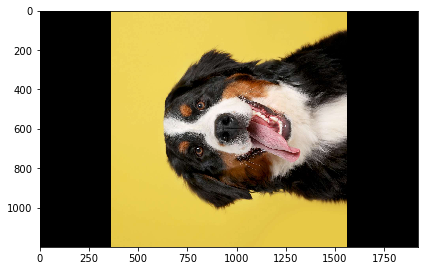

In [102]:
from skimage import transform
img= io.imread('D:\download\chien.jpg')
img_rot=transform.rotate(img,90)
io.imshow(img_rot)

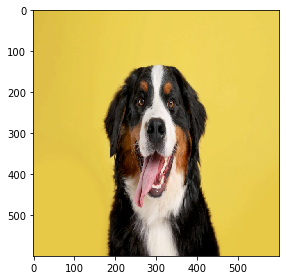

In [107]:
img= io.imread('D:\download\chien.jpg')
img_rez=transform.resize(img,(600,600))
io.imshow(img_rez)

Compare structural similarity between two images. It show us how simiar two images are. We use an index, that when it is closer 
to 1 show a high similarity between images and when is closer to 0 show less similarity.

In [ ]:
from skimage.measure import compare_ssim
index1= compare_ssim(dog,dog,data_range=dog.max()-dog.min(), multichannel=True)
index2= compare_ssim(dog,img,data_range=img.max()-img.min(), multichannel=True)
print(index1,index2)